# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#local = 'Olathe'
base_url='https://api.openweathermap.org/data/2.5/weather?'
url = f"{base_url}q={city}&units=imperial&appid={weather_api_key}"
print(url)
response = requests.get(url)
data = response.json()
data

https://api.openweathermap.org/data/2.5/weather?q=taiohae&units=imperial&appid=c24641dc030d2f26756b51220d04c0a9


{'cod': '404', 'message': 'city not found'}

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    time.sleep(1)    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&units=imperial&appid={weather_api_key}"
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    req = requests.get(city_url)
    req=req.json()
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = req['name']

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = req['coord']['lat']
        city_lng = req['coord']['lon']
        city_max_temp = req['main']['temp_max']
        city_humidity = req['main']['humidity']
        city_clouds = req['clouds']['all']
        city_wind = req['wind']['speed']
        city_country = req['sys']['country']
        city_date = req['dt']

        #Append the City information into city_data list
        city_data.append({"City": city_weather, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=crane&units=imperial&appid=c24641dc030d2f26756b51220d04c0a9
Processing Record 1 of Set 1 | crane
https://api.openweathermap.org/data/2.5/weather?q=thal&units=imperial&appid=c24641dc030d2f26756b51220d04c0a9
Processing Record 2 of Set 1 | thal
https://api.openweathermap.org/data/2.5/weather?q=weno&units=imperial&appid=c24641dc030d2f26756b51220d04c0a9
Processing Record 3 of Set 1 | weno
https://api.openweathermap.org/data/2.5/weather?q=puerto ayora&units=imperial&appid=c24641dc030d2f26756b51220d04c0a9
Processing Record 4 of Set 1 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?q=buala&units=imperial&appid=c24641dc030d2f26756b51220d04c0a9
Processing Record 5 of Set 1 | buala
https://api.openweathermap.org/data/2.5/weather?q=anadyr&units=imperial&appid=c24641dc030d2f26756b51220d04c0a9
Processing Record 6 of Set 1 | anadyr
https://api.openweathermap.org/data/2.5/weathe

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Crane,31.3974,-102.3501,66.20,22,8,13.96,US,1714137451
1,Thal,35.4791,72.2439,48.60,74,100,3.58,PK,1714137453
2,Weno,7.4515,151.8468,84.15,94,75,9.22,FM,1714137456
3,Puerto Ayora,-0.7393,-90.3518,77.56,96,71,1.01,EC,1714137458
4,Buala,-8.1450,159.5921,81.43,82,100,3.24,SB,1714137461


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Crane,31.3974,-102.3501,66.20,22,8,13.96,US,1714137451
1,Thal,35.4791,72.2439,48.60,74,100,3.58,PK,1714137453
2,Weno,7.4515,151.8468,84.15,94,75,9.22,FM,1714137456
3,Puerto Ayora,-0.7393,-90.3518,77.56,96,71,1.01,EC,1714137458
4,Buala,-8.1450,159.5921,81.43,82,100,3.24,SB,1714137461


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

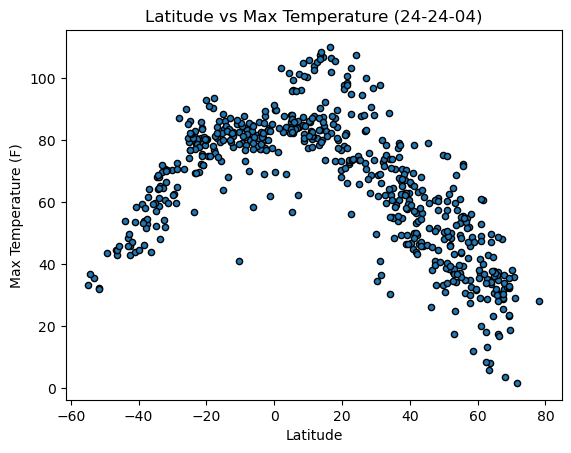

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat",y="Max Temp", edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Max Temperature (24-24-04)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

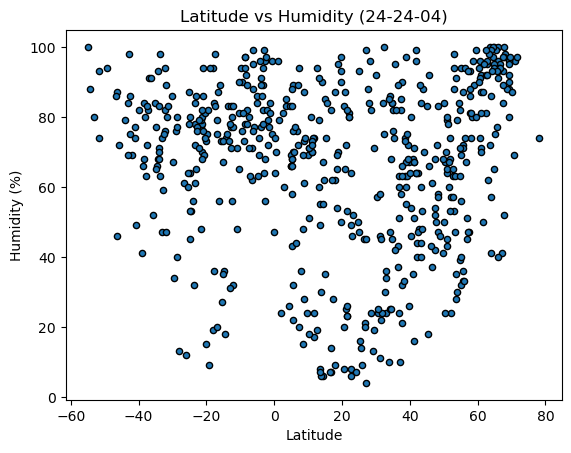

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat",y="Humidity", edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity (24-24-04)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

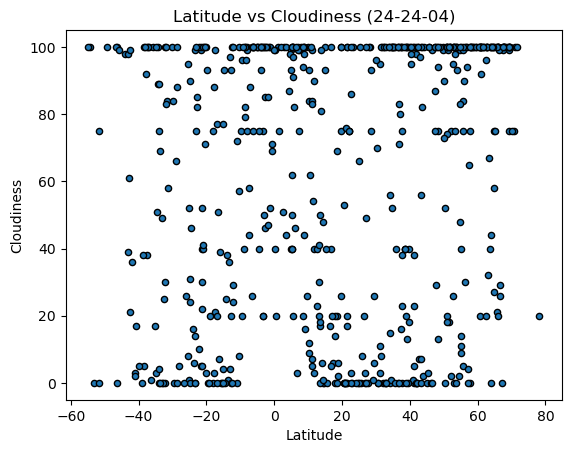

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat",y="Cloudiness", edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (24-24-04)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

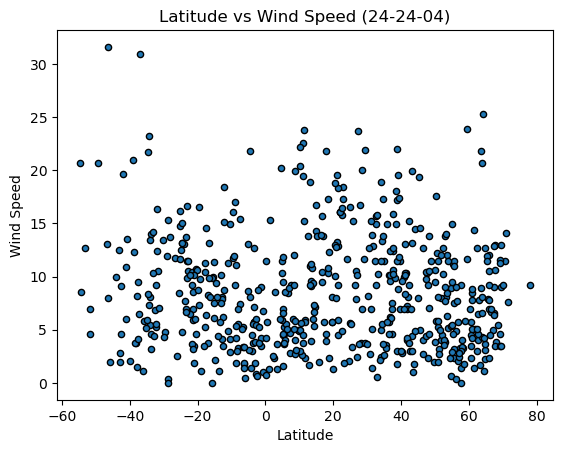

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat",y="Wind Speed", edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed (24-24-04)")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
x = city_data_df['Lat']
y = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
print(f"The rvalue is: {round(rvalue**2,2)}")

The rvalue is: 0.0


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data_df_copy = city_data_df
northern_list = []
for index,row in city_data_df_copy.iterrows():
    if row["Lat"]>=0:
        northern_list.append(row)
northern_hemi_df = pd.DataFrame(northern_list)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Crane,31.3974,-102.3501,66.20,22,8,13.96,US,1714137451
1,Thal,35.4791,72.2439,48.60,74,100,3.58,PK,1714137453
2,Weno,7.4515,151.8468,84.15,94,75,9.22,FM,1714137456
5,Anadyr,64.7500,177.4833,30.70,100,100,2.24,RU,1714137463
7,Wāngjing,24.6000,94.0333,75.04,50,0,2.10,IN,1714137467


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_list = []
for index,row in city_data_df_copy.iterrows():
    if row["Lat"]<0:
        southern_list.append(row)
southern_hemi_df = pd.DataFrame(southern_list)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Puerto Ayora,-0.7393,-90.3518,77.56,96,71,1.01,EC,1714137458
4,Buala,-8.1450,159.5921,81.43,82,100,3.24,SB,1714137461
6,Cidreira,-30.1811,-50.2056,70.45,86,100,13.44,BR,1714137465
9,Adamstown,-25.0660,-130.1015,74.14,87,52,16.13,PN,1714137471
10,Port-aux-Français,-49.3500,70.2167,43.54,94,100,20.65,TF,1714137473


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: 0.73


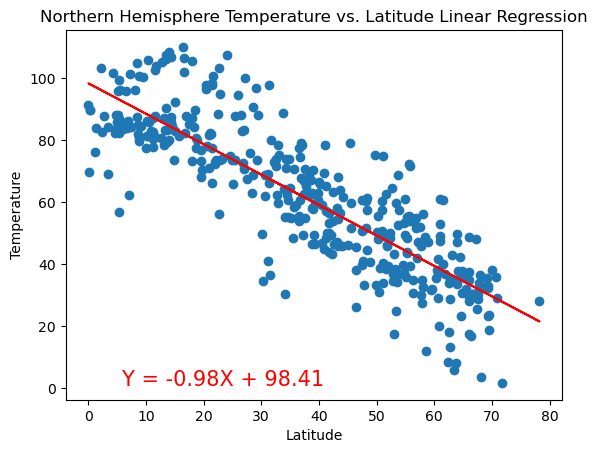

In [65]:
# Linear regression on Northern Hemisphere
NTemp = northern_hemi_df["Max Temp"]
NLat = northern_hemi_df['Lat']
plt.scatter(NLat,NTemp)
plt.xlabel("Latitude")
plt.ylabel('Temperature')
plt.title("Northern Hemisphere Temperature vs. Latitude Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NLat,NTemp)
regress_value = NLat * slope + intercept
line_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
plt.plot(NLat, regress_value, "r-")
plt.annotate(line_eq, (5.8,0.8), fontsize=15, color = "red")
correlation = st.pearsonr(NLat,NTemp)
print(f"The rvalue is: {round(rvalue**2,2)}") 
plt.show()

The rvalue is: 0.62


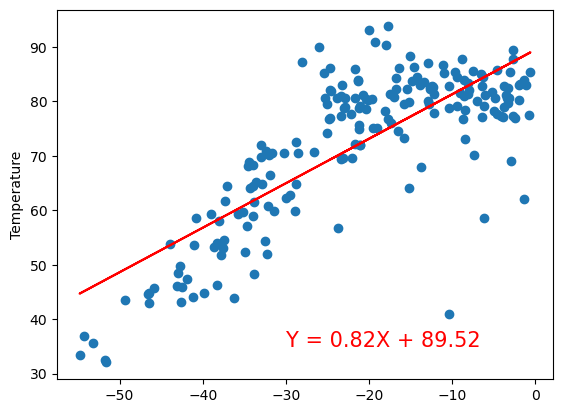

In [66]:
# Linear regression on Southern Hemisphere
STemp = southern_hemi_df["Max Temp"]
SLat = southern_hemi_df['Lat']
plt.scatter(SLat,STemp)
plt.ylabel("Latitude")
plt.ylabel('Temperature')
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLat,STemp)
regress_value = SLat * slope + intercept
line_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
plt.plot(SLat, regress_value, "r-")
plt.annotate(line_eq, (-30, 35), fontsize=15, color = "red")
print(f"The rvalue is: {round(rvalue**2,2)}") 
plt.show()

**Discussion about the linear relationship:** The correlation Rvalue is strong for both Hemispheres.  Both graphs showed the closer to the equator the warmer the max temp would be.

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.09896


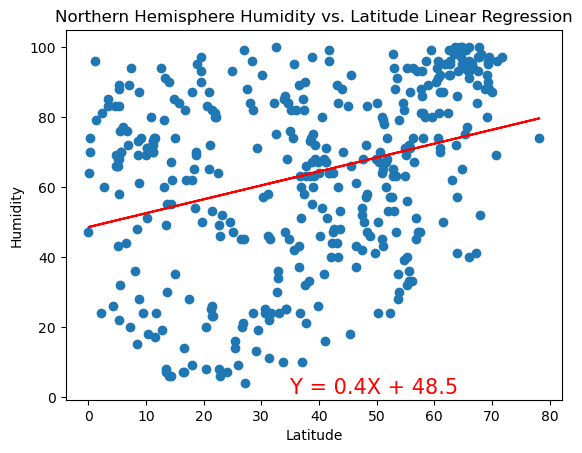

In [74]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
NHum = northern_hemi_df["Humidity"]
NLat = northern_hemi_df['Lat']
plt.scatter(NLat,NHum)
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.title("Northern Hemisphere Humidity vs. Latitude Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NLat,NHum)
regress_value = NLat * slope + intercept
line_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
plt.plot(NLat, regress_value, "r-")
plt.annotate(line_eq, (35,0.8), fontsize=15, color = "red")
correlation = st.pearsonr(NLat,NHum)
print(f"The rvalue is: {round(rvalue**2,5)}") 
plt.show()

The rvalue is: 0.00338


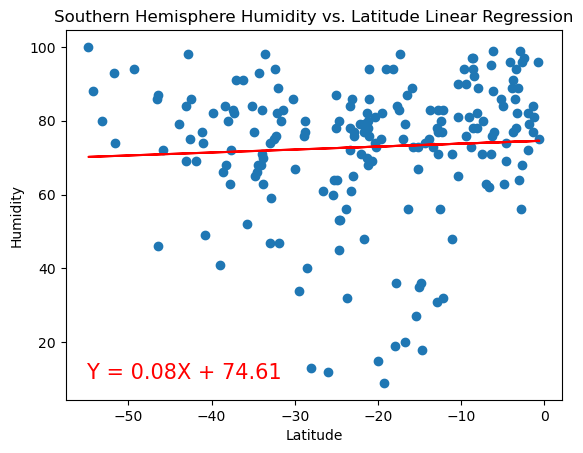

In [73]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
SHum = southern_hemi_df["Humidity"]
SLat = southern_hemi_df['Lat']
plt.scatter(SLat,SHum)
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.title("Southern Hemisphere Humidity vs. Latitude Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLat,SHum)
regress_value = SLat * slope + intercept
line_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
plt.plot(SLat, regress_value, "r-")
plt.annotate(line_eq, (-55,10), fontsize=15, color = "red")
correlation = st.pearsonr(SLat,SHum)
print(f"The rvalue is: {round(rvalue**2,5)}") 
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between Humidity and latitude.  Location to the equator may not necessarily mean more rainfall or humidity in that area.

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.04


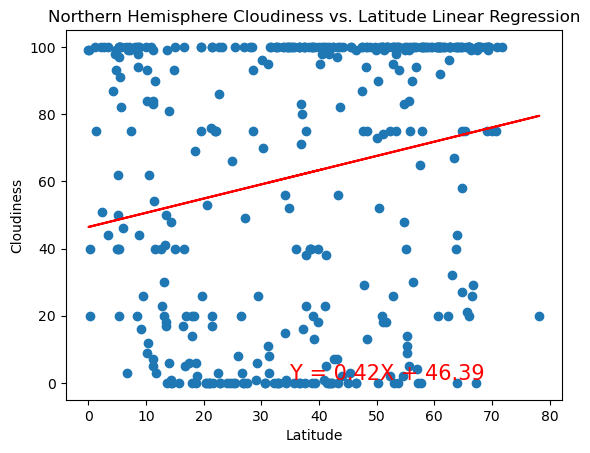

In [77]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
Ncloud = northern_hemi_df["Cloudiness"]
NLat = northern_hemi_df['Lat']
plt.scatter(NLat,Ncloud)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere Cloudiness vs. Latitude Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NLat,Ncloud)
regress_value = NLat * slope + intercept
line_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
plt.plot(NLat, regress_value, "r-")
plt.annotate(line_eq, (35,0.8), fontsize=15, color = "red")
correlation = st.pearsonr(NLat,Ncloud)
print(f"The rvalue is: {round(rvalue**2,2)}") 
plt.show()

The rvalue is: 0.02349


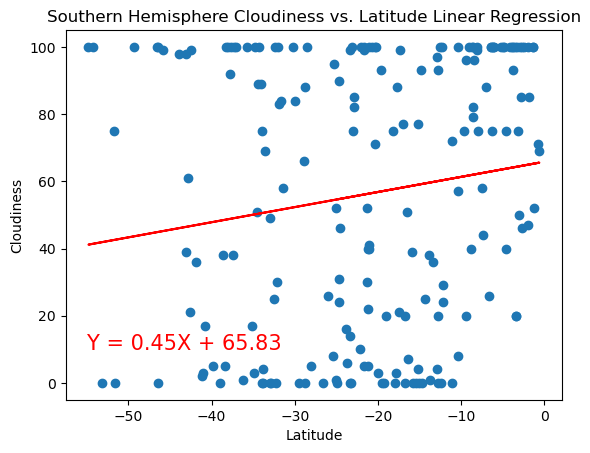

In [78]:
# Southern Hemisphere
Scloud = southern_hemi_df["Cloudiness"]
SLat = southern_hemi_df['Lat']
plt.scatter(SLat,Scloud)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Cloudiness vs. Latitude Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLat,Scloud)
regress_value = SLat * slope + intercept
line_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
plt.plot(SLat, regress_value, "r-")
plt.annotate(line_eq, (-55,10), fontsize=15, color = "red")

print(f"The rvalue is: {round(rvalue**2,5)}") 
plt.show()

**Discussion about the linear relationship:** Weak correlation between cloudiness and lat.  Both graphs showed a wide range of clouds vs no clouds regardless of location.

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: 0.00879


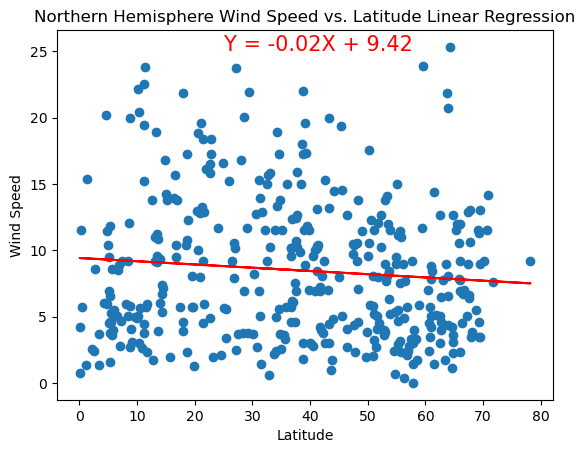

In [83]:
# Northern Hemisphere
Nwind = northern_hemi_df["Wind Speed"]
NLat = northern_hemi_df['Lat']
plt.scatter(NLat,Nwind)
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere Wind Speed vs. Latitude Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NLat,Nwind)
regress_value = NLat * slope + intercept
line_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
plt.plot(NLat, regress_value, "r-")
plt.annotate(line_eq, (25,25), fontsize=15, color = "red")
print(f"The rvalue is: {round(rvalue**2,5)}") 
plt.show()

The rvalue is: 0.07855


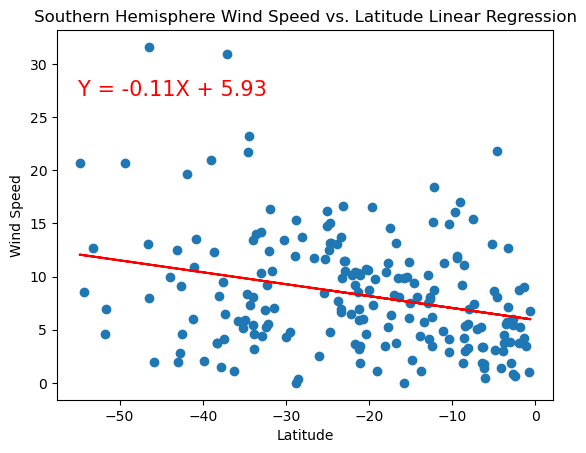

In [87]:
# Southern Hemisphere
Swind = southern_hemi_df["Wind Speed"]
SLat = southern_hemi_df['Lat']
plt.scatter(SLat,Swind)
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere Wind Speed vs. Latitude Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SLat,Swind)
regress_value = SLat * slope + intercept
line_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
plt.plot(SLat, regress_value, "r-")
plt.annotate(line_eq, (-55,27), fontsize=15, color = "red")

print(f"The rvalue is: {round(rvalue**2,5)}") 
plt.show()

**Discussion about the linear relationship:** Weak correlation between wind speed and latitude.  Both graphs showed a wide range regardless of location.